# Robust Regression

Robust regression is an alternative to least squares regression when data are contaminated with outliers or influential observations, and it can also be used for he purpose of detecting influential observations. It can be used in any case in which least square regression can be applied.

We consider the linear model

\begin{align}
y^{(i)} & = \alpha + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)}+ \cdots + \beta_k x_k^{(i)} + \epsilon^{(i)} \\
        &=\mathbf{x}^{(i)}\cdot\beta
\end{align}

where $\beta=(\alpha,\beta_1,\dots,\beta_k)$ and $ \mathbf{x}^{(i)}=(1,x_1^{(i)},\dots,x_k^{(i)}) $ for $i = 1,\cdots,$ and $n$ is the number of observations.

The fitted model is

\begin{align}
\hat{y}^{(i)} & = a + b_1 x_1^{(i)} + b_2 x_2^{(i)}+ \cdots + b_k x_k^{(i)} + e^{(i)} \\
        &=\mathbf{x}^{(i)}\cdot b
\end{align}

where $b$ is an estimator for $\beta$.

The residuals are given by

$$ e^{(i)} = y^{(i)}-\hat{y}^{(i)}$$

$M$-estimations are a generalization of maximum likelihodd estimators (*MLE*). With $M$-estimation, the estimates $b$ are determined by minimizing an objective function $\rho$ over all $b$ such that 

$$\sum_{i=1}^{n} \rho(e^{(i)})= \sum_{i=1}^{n}\rho(y^{(i)}-\mathbf{x}^{(i)}\cdot b)$$

where $\rho$ have the following properties.
 - $\rho(e)\geq 0$ and $\rho(0)=0 $ (*nonnegative*)
 - $\rho(e)=\rho(-e)$ (*symmetric*)
 - $\rho(e)>\rho(e')$ for $|e|)>|e'|)$  (monotone in $|e|$)
 
We want to find the estimators $b$ such that

$$\underset{b}{argmin} \sum_{i=1}^{n}\rho(y^{(i)}-\mathbf{x}^{(i)}\cdot b)$$

Define a function $\psi:\rho'$ where $\rho'$ is the derivative of $\rho$.

After taking derivative of the objective function, equal to 0, we obtain

\begin{align}
0 = & \sum_{i=1}^{n}\rho'(y^{(i)}-\mathbf{x}^{(i)}\cdot b)\mathbf{x}^{(i)} \\
  = & \sum_{i=1}^{n}\psi(y^{(i)}-\mathbf{x}^{(i)}\cdot b)\mathbf{x}^{(i)}
\end{align}

Define the weight function $w(e)=\psi(e)/e $ and $ w^{(i)}=w(e^{i})$. Substitute into the above equation
$$ \sum \underbrace{w(y^{(i)}-\mathbf{x}^{(i)}\cdot b)}_{w_i} (y^{(i)}-\mathbf{x}^{(i)}\cdot b)\mathbf{x}^{(i)}=0$$
$$ \sum w_i (y^{(i)}-\mathbf{x}^{(i)}\cdot b)\mathbf{x}^{(i)}=0$$

With iteratively reweighted least squares, *IRLS*
 - Choose initial estimates $ b^{(0)} $ such as the least squares estimates
 - At each iteration $j$, calculate the residual $e^{(j-1)}$ and associated weights $w^{(j-1)}$
 - Solve for new weighted least squares estimates
 $$ b^{(j)}=[X'W^{(j-1)}X]^{-1}X'W^{(j-1)}Y$$

where $X$ is the model matrix with $\mathbf{x}^{(i)}$ as $i$th row, and $W^{(j-1)}=diag{w^{(j-1)}}$.
Repeat till the estimates coefficients converge.


# Implementation in R


Robust regression can be perform using the *rlm()* function in *MASS* package. The outliers can be weighted down differently based on *huber*, *bi-square* and *hampel's* method.  

In [24]:
#loading the packages 
require(foreign)
require(MASS)

# Description of the Dataset
We will use the crime dataset from *Statistical Methods for Social Sciences, Third Edition, Alan Agresti and Barbara Finlay (Prentice Hall, 1997)*

**sid**: state id

**state** : state name

**crime** : violent crimes per 100,000 people

**murder** : murder per 1,000,000

**pctmetro** : the percent of the population living in metropolitan areas

**pctwhite** : the percent of the population that is white

**pcths** : the percent of population with a high school education or above

**poverty** : the percent of population living under poverty line 

**single** : the percent of population that are single parents

In [50]:
#load the data as cdata
cdata <- read.dta("https://stats.idre.ucla.edu/stat/data/crime.dta")
cdata[1:10, ] # first ten observations
summary(cdata)

sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3
2,al,780,11.6,67.4,73.5,66.9,17.4,11.5
3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7
4,az,715,8.6,84.7,88.6,78.7,15.4,12.1
5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5
6,co,567,5.8,81.8,92.5,84.4,9.9,12.1
7,ct,456,6.3,95.7,89.0,79.2,8.5,10.1
8,de,686,5.0,82.7,79.4,77.5,10.2,11.4
9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6
10,ga,723,11.4,67.7,70.8,70.9,13.5,13.0


      sid          state               crime            murder      
 Min.   : 1.0   Length:51          Min.   :  82.0   Min.   : 1.600  
 1st Qu.:13.5   Class :character   1st Qu.: 326.5   1st Qu.: 3.900  
 Median :26.0   Mode  :character   Median : 515.0   Median : 6.800  
 Mean   :26.0                      Mean   : 612.8   Mean   : 8.727  
 3rd Qu.:38.5                      3rd Qu.: 773.0   3rd Qu.:10.350  
 Max.   :51.0                      Max.   :2922.0   Max.   :78.500  
    pctmetro         pctwhite         pcths          poverty     
 Min.   : 24.00   Min.   :31.80   Min.   :64.30   Min.   : 8.00  
 1st Qu.: 49.55   1st Qu.:79.35   1st Qu.:73.50   1st Qu.:10.70  
 Median : 69.80   Median :87.60   Median :76.70   Median :13.10  
 Mean   : 67.39   Mean   :84.12   Mean   :76.22   Mean   :14.26  
 3rd Qu.: 83.95   3rd Qu.:92.60   3rd Qu.:80.10   3rd Qu.:17.40  
 Max.   :100.00   Max.   :98.50   Max.   :86.60   Max.   :26.40  
     single     
 Min.   : 8.40  
 1st Qu.:10.05  
 Med

In [51]:
#We are goning to use *poverty* and *single* to predict *crime*
#To determine the outliers in the dataset, firstly we start by running least square regression
summary(ols <- lm(crime ~ poverty + single, data=cdata))



Call:
lm(formula = crime ~ poverty + single, data = cdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-811.14 -114.27  -22.44  121.86  689.82 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1368.189    187.205  -7.308 2.48e-09 ***
poverty         6.787      8.989   0.755    0.454    
single        166.373     19.423   8.566 3.12e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 243.6 on 48 degrees of freedom
Multiple R-squared:  0.7072,	Adjusted R-squared:  0.695 
F-statistic: 57.96 on 2 and 48 DF,  p-value: 1.578e-13


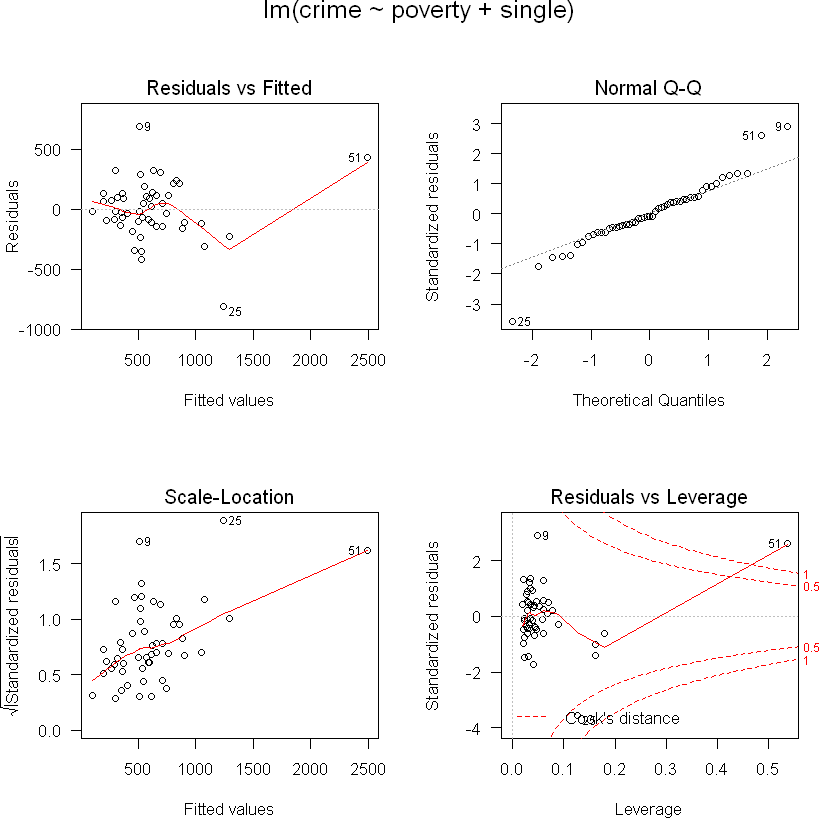

In [52]:
opar <- par(mfrow = c(2,2), oma=c(0,0,1.1,0)) # grafikleri 2ye 2 lik matrix şeklinde gösterdi. oma is lm(crime....) başlığını yazdı
plot(ols, las=1)

In [53]:
# 9 25 ve 51 inci gözlemler  uzakta kalmışlar.
#data[row , columns] yazarak istenilen değerleri verisetinden çekiyorsun.
cdata[c(9, 25, 51), 1:2]

,sid,state
9,9,fl
25,25,ms
51,51,dc


Dc, fl and ms have either high leverage or larger residuals. We will find the Cook's distance

In [36]:
d1 <- cooks.distance(ols)
r <- stdres(ols) # the standardized residuals
a <- cbind(cdata, d1, r)
a[d1 > 4/51, ] # a da d1 kolununda 4/51 den büyük olan verileri çekti. gözlem sayısı 51 olduğu için 4/51 dedik. Niye 4 ?

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,d1,r
1,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,0.1254750,-1.397418
9,9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6,0.1425891,2.902663
25,25,ms,434,13.5,30.7,63.3,64.3,24.7,14.7,0.6138721,-3.562990
51,51,dc,2922,78.5,100.0,31.8,73.1,26.4,22.1,2.6362519,2.616447


51 inci satırda ki dc ülkesinin Cook's distance yüksek olduğu için kaldırılmalı. robust regression bunu yapıyor. Şimdi residual ları mutlak değerini alıp kıyaslama yapacağız.

In [37]:
rabs <- abs(r)
a <-cbind(cdata, d1, r, rabs)
a[order(-rabs), ][1:10, ] # bütün satırda rabs  kolununda order ile residualları büyükten küçüğe sıralama yaptıktan sonra
#  oluşan matrikste ilk 10 satırı aldık

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,d1,r,rabs
25,25,ms,434,13.5,30.7,63.3,64.3,24.7,14.7,0.61387212,-3.562990,3.562990
9,9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6,0.14258909,2.902663,2.902663
51,51,dc,2922,78.5,100.0,31.8,73.1,26.4,22.1,2.63625193,2.616447,2.616447
46,46,vt,114,3.6,27.0,98.4,80.8,10.0,11.0,0.04271548,-1.742409,1.742409
26,26,mt,178,3.0,24.0,92.6,81.0,14.9,10.8,0.01675501,-1.460885,1.460885
21,21,me,126,1.6,35.7,98.5,78.8,10.7,10.6,0.02233128,-1.426741,1.426741
1,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,0.12547500,-1.397418,1.397418
31,31,nj,627,5.3,100.0,80.8,76.7,10.9,9.6,0.02229184,1.354149,1.354149
14,14,il,960,11.4,84.0,81.0,76.2,13.6,11.5,0.01265689,1.338192,1.338192
20,20,md,998,12.7,92.8,68.9,78.4,9.7,12.0,0.03569623,1.287087,1.287087


 robust regression için MASS paketinde rlm() komutu ile çalıştırılır.
 Çeşitli weight fonksiyonlarını kullanabiliriz: Huber , bisquare, hampel 

In [38]:
robModel <- rlm (crime ~ poverty + single, psi = psi.huber, data = cdata) # Robust Regrression

summary(robModel) # model summary


Call: rlm(formula = crime ~ poverty + single, data = cdata, psi = psi.huber)
Residuals:
    Min      1Q  Median      3Q     Max 
-846.09 -125.80  -16.49  119.15  679.94 

Coefficients:
            Value      Std. Error t value   
(Intercept) -1423.0373   167.5899    -8.4912
poverty         8.8677     8.0467     1.1020
single        168.9858    17.3878     9.7186

Residual standard error: 181.8 on 48 degrees of freedom

In [13]:
hweight <- data.frame(state = cdata$state, resid = robModel$resid, weight = robModel$w)
hweight1 <- hweight[order(robModel$w), ]
hweight1[1:15, ]

,state,resid,weight
25,ms,-846.08536,0.2889618
9,fl,679.94327,0.3595480
46,vt,-410.48310,0.5955740
51,dc,376.34468,0.6494131
26,mt,-356.13760,0.6864625
21,me,-337.09622,0.7252263
31,nj,331.11603,0.7383578
14,il,319.10036,0.7661169
1,ak,-313.15532,0.7807432
20,md,307.19142,0.7958154


residuallar düştükçe weights değerleri yükseliyor. Weights değerleri 1 e ne kadar yakınsa robust regression da linear regressiona o kadar yakındır.

In [20]:
robModel1 <- rlm(crime ~ poverty + single, data = cdata, psi = psi.bisquare)
summary(robModel1)


Call: rlm(formula = crime ~ poverty + single, data = cdata, psi = psi.bisquare)
Residuals:
    Min      1Q  Median      3Q     Max 
-905.59 -140.97  -14.98  114.65  668.38 

Coefficients:
            Value      Std. Error t value   
(Intercept) -1535.3338   164.5062    -9.3330
poverty        11.6903     7.8987     1.4800
single        175.9303    17.0678    10.3077

Residual standard error: 202.3 on 48 degrees of freedom

In [22]:
bweight <- data.frame(state = cdata$state, resid = robModel1$resid, weight = robModel1$w)
bweight1 <- bweight[order(robModel1$w), ]
bweight1[1:15, ]

,state,resid,weight
25,ms,-905.5931,0.007652565
9,fl,668.3844,0.252870542
46,vt,-402.8031,0.671495418
26,mt,-360.8997,0.731136908
31,nj,345.9780,0.751347695
18,la,-332.6527,0.768938330
21,me,-328.6143,0.774103322
1,ak,-325.8519,0.777662383
14,il,313.1466,0.793658594
20,md,308.7737,0.799065530


In [21]:
robModel2 <- rlm(crime ~ poverty + single, data = cdata, psi = psi.hampel)
summary(robModel2)


Call: rlm(formula = crime ~ poverty + single, data = cdata, psi = psi.hampel)
Residuals:
   Min     1Q Median     3Q    Max 
-866.1 -134.3  -10.8  116.1  678.5 

Coefficients:
            Value      Std. Error t value   
(Intercept) -1469.5915   163.9485    -8.9637
poverty         9.6270     7.8719     1.2230
single        172.2396    17.0100    10.1258

Residual standard error: 186.4 on 48 degrees of freedom

In [23]:
haweight <- data.frame(state = cdata$state, resid = robModel2$resid, weight = robModel2$w)
haweight1 <- haweight[order(robModel2$w), ]
haweight1[1:15, ]

,state,resid,weight
25,ms,-866.11699,0.3611173
9,fl,678.49144,0.5495930
46,vt,-407.31382,0.9155092
1,ak,-320.04020,1.0000000
2,al,101.32667,1.0000000
3,ar,27.08820,1.0000000
4,az,-47.76317,1.0000000
5,ca,219.38548,1.0000000
6,co,-142.81473,1.0000000
7,ct,104.14222,1.0000000


For the crime dataset, The Huber's weight function is better than other with residual standart error 181.8

# Sorular

 - Weight function niye $\rho'(e)/e$ olarak tanımlandı ? Bir fonksiyounun türevinin değişkenine oranı weight function mıdır?
 
 
 - IRLS ' de $b^{(j)}=X^{-1}Y $ yazmayıp da neden şu yolu kullanmış
\begin{align}
b^{(j)}=& X^{-1}[X'W^{(j-1)}]^{-1}X'W^{(j-1)}Y \\
=& X'W^{(j-1)}X^{-1}X'W^{(j-1)}Y
\end{align}


 - Uygulamada niye poverty ve single kullanarak crime ı tahmin etmeye çalıştık ? Diğer kolonların anlamlı olup olmadığını nasıl karar vereceğiz ? Ben poverty ve single kullanarak murder ı predict etmeye çalıştım ve residuallar 450 500 civarı çıktı. Murder için bu model kötü bir model diyebilir miyim yani ?
 
 
 - Cook's Distance hesaplarken $>\frac{4}{n}$ olarak kısıtlama var, n is # observations,  why 4 ?

# References

https://stats.idre.ucla.edu/other/dae/

http://rstatistics.net/

https://socialsciences.mcmaster.ca/jfox/Books/Companion/appendix/Appendix-Robust-Regression.pdf